### Imports

In [1]:
import numpy as np
import pickle
import sklearn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.base import clone

### Load Data

In [2]:
with open('keypoints2', 'rb') as file:
    data = pickle.load(file)

#### Process By Gloss

##### Relative Transformation

In [3]:
def rel_transform_inplace(hand_keypoint):
    hand_keypoint[0::3] -= hand_keypoint[0]
    hand_keypoint[1::3] -= hand_keypoint[1]

### Process Function

In [4]:
X = []
y = []
gloss_map = []
for index, (name, gloss) in enumerate(data.items()):
    gloss_map.append(name)
    xs = []
    for frame in [frame 
        for variant in gloss.values() 
        for session in variant.values() 
        for frame in session]:
        left_keypoint = np.array(frame['hand_left_keypoints_2d'])
        right_keypoint = np.array(frame['hand_right_keypoints_2d'])
        rel_transform_inplace(left_keypoint)
        rel_transform_inplace(right_keypoint)
        xs.append(np.concatenate((left_keypoint, right_keypoint)))
    ys = np.full((len(xs)), index)
    X.append(xs)
    y.append(ys)
X = np.concatenate(X, axis=0)
y = np.concatenate(y)

### Split Test Train

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True, random_state=0)

### Learning Curve

In [6]:
def learning_curve(model, X_train, X_test, y_train, y_test):
    train_scores = []
    test_scores = []
    
    for i in np.arange(0.1, 1.1, 0.1):
        train_size = int(len(X_train) * i)
        X_train_ = X_train[:train_size]
        y_train_ = y_train[:train_size]
        
        model_ = clone(model)
        model_.fit(X_train_, y_train_)
        train_pred = model_.predict(X_train_)
        test_pred = model_.predict(X_test)
        
        train_acc = accuracy_score(y_train_, train_pred)
        test_acc = accuracy_score(y_test, test_pred)
        
        train_scores.append(train_acc)
        test_scores.append(test_acc)
        
        print(f'{int(i * 100)}%', end=' ')
    print()
        
    plt.plot(train_scores, label='Train')
    plt.plot(test_scores, label='Test')
    plt.title('Learning Curve')
    plt.ylabel('Accuracy')
    plt.xlabel('% of Training Size')
    plt.xticks(range(10), (np.arange(0.1, 1.1, 0.1) * 100).astype(int))
    plt.ylim(0.0, 1.01)
    plt.legend()
    
    print(f'Final Training Accuracy: {train_scores[-1] * 100}%')
    print(f'Final Testing Accuracy: {test_scores[-1] * 100}%')

### Models

#### Random Forest Classifier

10% 20% 30% 40% 50% 60% 70% 80% 90% 100% 
Final Training Accuracy: 100.0%
Final Testing Accuracy: 99.19678714859438%


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

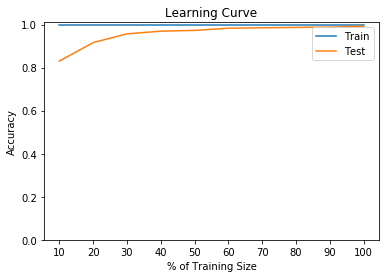

In [7]:
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1)
learning_curve(rfc, X_train, X_test, y_train, y_test)
rfc.fit(X_train, y_train)

#### Support Vector Classifier

In [8]:
svc = SVC(gamma='auto')
#learning_curve(svc, X_train, X_test, y_train, y_test)

In [9]:
#clf = GridSearchCV(svc, {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf', 'linear', 'poly']}, verbose=1, n_jobs=-1)
#clf.fit(X_train, y_train)
#print(clf.cv_results_)
#clf_pred = clf.predict(X_test)
#clf_acc = accuracy_score(y_test, clf_pred)
#print('Best Params:', clf.best_params_)
#print('Accuracy:', clf_acc)

### Extra Trees Classifier

10% 20% 30% 40% 50% 60% 70% 80% 90% 100% 
Final Training Accuracy: 100.0%
Final Testing Accuracy: 99.28284566838784%


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

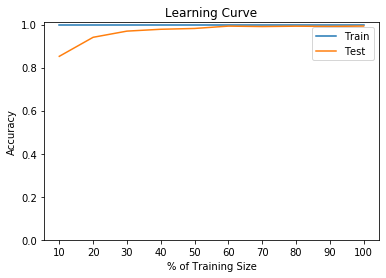

In [10]:
etc = ExtraTreesClassifier(n_estimators=100, n_jobs=-1)
learning_curve(etc, X_train, X_test, y_train, y_test)
etc.fit(X_train, y_train)

### Save

In [11]:
with open('X', 'wb') as file: pickle.dump(X, file)
    
with open('y', 'wb') as file: pickle.dump(y, file)
    
with open('gloss_map', 'wb') as file: pickle.dump(gloss_map, file)
    
with open('rfc', 'wb') as file: pickle.dump(rfc, file)
    
#with open('clf', 'wb') as file: pickle.dump(clf, file)

with open('etc', 'wb') as file: pickle.dump(etc, file)